# Trabalho 2 de modelos Lineares
Aluno: 
- Gustavo de Souza Curty 

In [1283]:
import matplotlib.pyplot as fig
import pandas as leitor
import numpy as np

In [1284]:
dados = leitor.read_csv('covid.csv', sep=",")

dadosusadosY =leitor.DataFrame(dados,columns=['Deaths'])
dadosusadosX1 =leitor.DataFrame(dados,columns=['Confirmed'])
dadosusadosX2 =leitor.DataFrame(dados,columns=['Recovered'])
dadosusadosX3 =leitor.DataFrame(dados,columns=['Active'])

quantidade = len(dadosusadosY)

matriz = []
y = []

for i in range(quantidade):
    matriz.append( [0] * 4 )
    y.append([0])

#for l in range(quantidade):
 #   for c in range(4):
  #      print(f'[{matriz[l][c]:^10}]', end=' ')
   # print()

#for l in range(4):
 #   for c in range(quantidade):
  #      print(f'[{matriztrans[l][c]:^10}]', end=' ')
   # print()

In [1285]:
xsoma = ysoma = 0
xsoma1 = xsoma2 = xsoma3 = ysoma = 0
ymed = xmed1 = xmed2 = xmed3 = 0
x1 = [0]*quantidade
x2 = [0]*quantidade
x3 = [0]*quantidade


for l in range(quantidade):
    y[l][0] = float(dadosusadosY.loc[l])
    ysoma = float (ysoma + y[l][0])
    matriz[l][0] = 1 
    matriz[l][1] = float(dadosusadosX1.loc[l])
    matriz[l][2] = float(dadosusadosX2.loc[l])
    matriz[l][3] = float(dadosusadosX3.loc[l])
    x1[l] = float(matriz[l][1])
    x2[l] = float(matriz[l][2])
    x3[l] = float(matriz[l][3])
    xsoma1 = float(xsoma1 + x1[l])
    xsoma2 = float(xsoma2 + x2[l])
    xsoma3 = float(xsoma3 + x3[l])

ymed = float(ysoma / (quantidade + 1))



# Questão 1:

# a) Faça o gráfico de dispersão bidimensional (XY) entre a variável y e cada uma das variáveis regressoras X1,..., Xp (p gráficos separados).

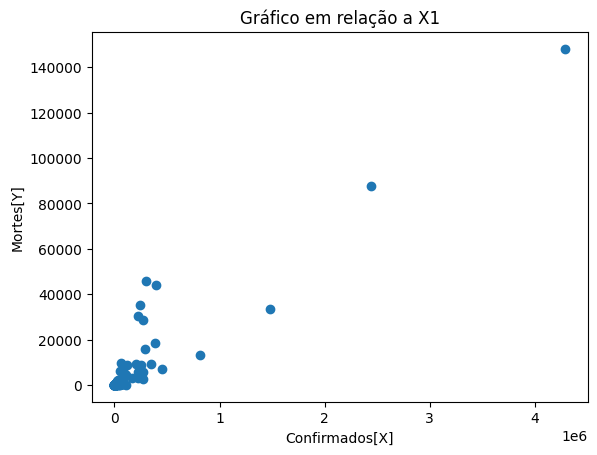

In [1286]:
fig.title('Gráfico em relação a X1')
fig.ylabel('Mortes[Y]')
fig.xlabel('Confirmados[X]')
fig.plot(x1,y,"o")
fig.show()

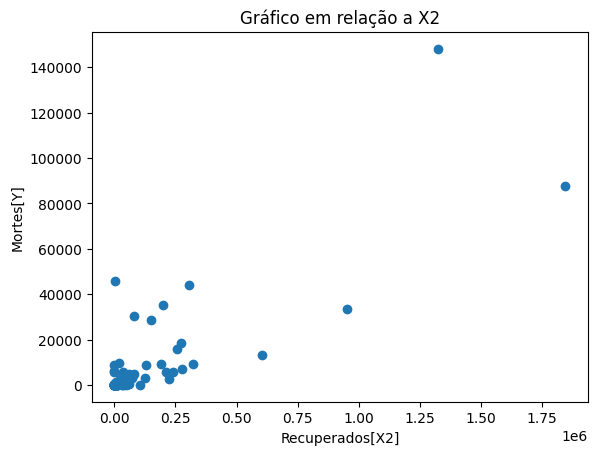

In [1287]:
fig.title('Gráfico em relação a X2')
fig.ylabel('Mortes[Y]')
fig.xlabel('Recuperados[X2]')
fig.plot(x2,y,"o")
fig.show()

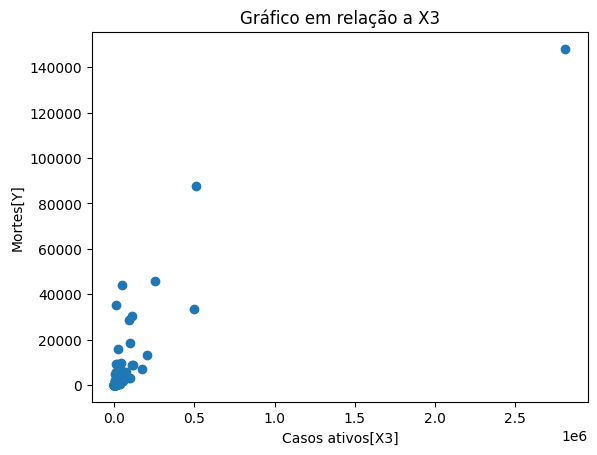

In [1288]:
fig.title('Gráfico em relação a X3')
fig.ylabel('Mortes[Y]')
fig.xlabel('Casos ativos[X3]')
fig.plot(x3,y,"o")
fig.show()

# b) Estime a correlação entre a variável Y e cada uma das variáveis regressoras. Comente.

In [1289]:
syy = sxx1 = sxy1 = 0
sxx2 = sxy2 = 0
sxx3 = sxy3 = 0
correlacao1 = correlacao2 = correlacao3 = 0
xmed1 = float(xsoma1/(quantidade))
xmed2 = float(xsoma2/(quantidade))
xmed3 = float(xsoma3/(quantidade))

for l in range(quantidade):
    sxx1 = float(sxx1 + ((x1[l] - xmed1)**2))
    sxx2 = float(sxx2 + ((x2[l] - xmed2)**2))
    sxx3 = float(sxx3 + ((x3[l] - xmed3)**2))
    syy = float(syy + ((y[l][0] - ymed)**2))
    sxy1 = float(sxy1 + ((x1[l] - xmed1)*(y[l][0] - ymed)))
    sxy2 = float(sxy2 + ((x2[l] - xmed2)*(y[l][0] - ymed)))
    sxy3 = float(sxy3 + ((x3[l] - xmed3)*(y[l][0] - ymed)))
  

correlacao1 = (sxy1)/(pow(sxx1*syy, 1/2))
correlacao2 = (sxy2)/(pow(sxx2*syy, 1/2))
correlacao3 = (sxy3)/(pow(sxx3*syy, 1/2))


print('As correlações são:')
print("correlação 1 =",correlacao1)
print("correlação 2 =",correlacao2)
print("correlação 3 =",correlacao3)

As correlações são:
correlação 1 = 0.9346976163726421
correlação 2 = 0.8320975432459067
correlação 3 = 0.8715851550504492




A correlação são métodos para se medir as relações entre variáveis e o que elas representam. Nesse caso, as correlações possuem maior grau de relacionamento linear positivo entre X e Y, se X varia em uma direção Y variará na mesma posição, pois se aproximam de 1. 

# c) Calcule o coeficiente de determinação R²(Y,Xi) entre a variável Y e cada uma das variáveis regressoras. Comente o resultado.



In [1290]:
sqreg1 = sqreg2 = sqreg3 = 0
b1 = float(sxy1/sxx1)
a1 = float(ymed - (b1*xmed1))
b2 = float(sxy2/sxx2)
a2 = float(ymed - (b2*xmed1))
b3 = float(sxy3/sxx3)
a3 = float(ymed - (b3*xmed3))

for cont in range(quantidade):
    sqreg1 = float(sqreg1 + ((a1 + (x1[cont]*b1)) - ymed)**2)
    sqreg2 = float(sqreg2 + ((a2 + (x2[cont]*b2)) - ymed)**2)
    sqreg3 = float(sqreg3 + ((a3 + (x3[cont]*b3)) - ymed)**2)

r1 = float(sqreg1/syy)
r2 = float(sqreg2/syy)
r3 = float(sqreg3/syy)

print("O coeficientes de determinação de X1: R² =",r1)
print("O coeficientes de determinação de X2: R² =",r2)
print("O coeficientes de determinação de X3: R² =",r3)

O coeficientes de determinação de X1: R² = 0.8736596340526986
O coeficientes de determinação de X2: R² = 0.7194483254934688
O coeficientes de determinação de X3: R² = 0.7596606825043155


O coeficiente de determinação expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. O R² varia entre 0 e 1

# d) Encontre o Hiperplano de quadrados mínimos (estime β0, β1 ... βp).

In [1291]:
matriztrans = []
for i in range(4):
    matriztrans.append( [0] * quantidade )

for count in range(quantidade):
    matriztrans[0][count] = 1
    matriztrans[1][count] = matriz[count][1]
    matriztrans[2][count] = matriz[count][2]
    matriztrans[3][count] = matriz[count][3]

mult1 = []
for i in range(quantidade):
    mult1.append( [0] * quantidade )

inverso = []
for i in range(4):
    inverso.append( [0] * 4)

mult1 = np.dot(matriztrans, matriz)
inverso = np.linalg.inv(mult1)


teste = []
for i in range(4):
    teste.append( [0] * 4)

teste = np.dot(mult1, inverso)




mult2 = []
for i in range(4):
    mult2.append( [0] * 4)

mult2 = np.dot(matriztrans, y)

beta = np.dot(inverso, mult2)

beta0 = beta[0][0]
beta1 = beta[1][0]
beta2 = beta[2][0]
beta3 = beta[3][0]
print('O Hiperplano é: ',beta[0][0],' + ',beta[1][0],'*X1 + ',beta[2][0],'*X2 + ',beta[3][0],'*X3')



O Hiperplano é:  -2.5538611225783825e-08  +  0.9999999999996021 X1 +  -0.9999999999995737 X2 +  -0.9999999999995879 X3


# e) Calcule os valores estimados de y (ou seja, Ŷ) através do hiperplano estimado no item anterior.

In [1292]:
Ŷ = []
for i in range(quantidade):
    Ŷ.append([0])

for l in range(quantidade):
    Ŷ[l][0] = float(beta[0][0] + (beta[1][0]*x1[l]) + (beta[2][0]*x2[l]) + (beta[3][0]*x3[l]))
    print('Os valores estimados de Ŷ (', l, ') é: ', Ŷ[l])


Os valores estimados de Ŷ ( 0 ) é:  [1268.9999999748125]
Os valores estimados de Ŷ ( 1 ) é:  [143.99999997451027]
Os valores estimados de Ŷ ( 2 ) é:  [1162.9999999746442]
Os valores estimados de Ŷ ( 3 ) é:  [51.99999997446429]
Os valores estimados de Ŷ ( 4 ) é:  [40.99999997446139]
Os valores estimados de Ŷ ( 5 ) é:  [2.9999999744622983]
Os valores estimados de Ŷ ( 6 ) é:  [3058.999999976615]
Os valores estimados de Ŷ ( 7 ) é:  [710.999999975078]
Os valores estimados de Ŷ ( 8 ) é:  [166.9999999747406]
Os valores estimados de Ŷ ( 9 ) é:  [712.9999999747165]
Os valores estimados de Ŷ ( 10 ) é:  [422.99999997505165]
Os valores estimados de Ŷ ( 11 ) é:  [10.999999974463549]
Os valores estimados de Ŷ ( 12 ) é:  [140.99999997548002]
Os valores estimados de Ŷ ( 13 ) é:  [2964.999999978245]
Os valores estimados de Ŷ ( 14 ) é:  [6.999999974461403]
Os valores estimados de Ŷ ( 15 ) é:  [537.9999999760503]
Os valores estimados de Ŷ ( 16 ) é:  [9821.99999997161]
Os valores estimados de Ŷ ( 17 ) é: 

# f) Calcule os resíduos, ou seja, o erro de estmação (Y - Ŷ).

In [1293]:
e = []
for i in range(quantidade):
    e.append([0])

valor = 0

for l in range(quantidade):
    e[l] = float(y[l][0]- Ŷ[l][0])
    print('Os resíduos são e(',l,')',e[l])


Os resíduos são e( 0 ) 2.5187546270899475e-08
Os resíduos são e( 1 ) 2.548972588556353e-08
Os resíduos são e( 2 ) 2.5355802790727466e-08
Os resíduos são e( 3 ) 2.5535712211421924e-08
Os resíduos são e( 4 ) 2.5538611225783825e-08
Os resíduos são e( 5 ) 2.5537701731082052e-08
Os resíduos são e( 6 ) 2.338492777198553e-08
Os resíduos são e( 7 ) 2.492197381798178e-08
Os resíduos são e( 8 ) 2.5259396352339536e-08
Os resíduos são e( 9 ) 2.528349796193652e-08
Os resíduos são e( 10 ) 2.4948349164333194e-08
Os resíduos são e( 11 ) 2.5536451175867114e-08
Os resíduos são e( 12 ) 2.4519977159798145e-08
Os resíduos são e( 13 ) 2.1755113266408443e-08
Os resíduos são e( 14 ) 2.553859701492911e-08
Os resíduos são e( 15 ) 2.394972398178652e-08
Os resíduos são e( 16 ) 2.8390786610543728e-08
Os resíduos são e( 17 ) 2.5538383852108382e-08
Os resíduos são e( 18 ) 2.5513372747809626e-08
Os resíduos são e( 19 ) 2.5535982217661513e-08
Os resíduos são e( 20 ) 2.531305653974414e-08
Os resíduos são e( 21 ) 2.5439

# g) Faça o histograma dos erros de estimação encontradosno item anterior. Comente sobre sua característica.

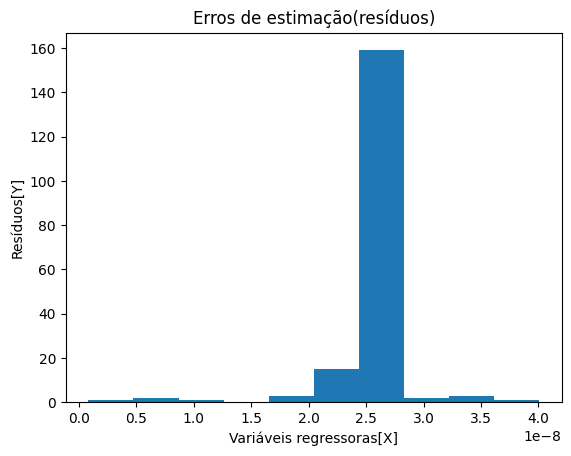

In [1294]:
fig.title('Erros de estimação(resíduos)')
fig.ylabel('Resíduos[Y]')
fig.xlabel('Variáveis regressoras[X]')
fig.hist(e)
fig.show()